In [1]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set(style="ticks")

In [2]:
######################
# PCA
# STEPS: Run all the cells below to produce the PCA plot
# The results show that dimensionality reduction is not able to linearly 
# separate the samples based on their AMD progression level
# most likely due to a small sample size and gene x gene interactions
######################

In [3]:
#Load all datasets
meta = pd.read_csv("data/EyeGEx_meta_combined_inferior_retina_summary_deidentified_geo_ids.csv")
gct = pd.read_table("data/EyeGEx_retina_combined_genelevel_expectedcounts_byrid_nooutlier.tpm.matrix.gct", header=2, delim_whitespace=True)
tsv = pd.read_csv("data/EyeGEx_retina_combined_genelevel_expectedcounts_byrid_nooutliers.counts.matrix.tsv", sep='\t')
controls = pd.read_csv("data/Retina.3009_ssva_controls.txt",header=None)

In [5]:
#Testing out PCA with significant genes from the paper itself (Supplementary Table 1)
known_genes = ["B3GLCT",
              "BLOC1S1",
               "RP11-644F5.10",
               "CTA-228A9.3",
               "SH2B3",
              "MEPCE",
              "PMS2P1",
               "STAG3L5P-PVRIG2P-PILRB",
              "PILRB",
              "TMEM199",
              "POLDIP2",
              "CFI",
              "PLA2G12A",
              "ANAPC11",
              "SKIV2L",
              "HERPUD1",
              "TOMM70",
              "KCNT2",
              "TMEM229B",
              "PLTP"]

In [6]:
#Filtering out all of the important genes
gct_known = gct[gct["Description"].isin(known_genes)]

In [7]:
#removing metadata and converting into numpy array for implementation
data = gct_known.drop(["NAME","Description"],axis=1)
data = data.to_numpy()
data = data.transpose()

In [8]:
#get mgs levels for each sample for the filtered genes
data_df = pd.DataFrame(data)
ids = list(gct.columns)
ids
ids.remove('NAME')
ids.remove('Description')
data_df.insert(0,"r_id",ids)
data_df=pd.merge(data_df, meta[["r_id","mgs_level"]], how="left", on="r_id")
mgs = data_df["mgs_level"]

In [11]:
#Standardize (mean-center) data
data_norm = data - np.mean(data, axis=0)

In [12]:
#Compute eigendecomposition to get eigenvectors and eigenvalues (principal components)
u,s,vh = np.linalg.svd(data_norm,full_matrices=False)

In [13]:
#Compute variance of each component as the ratio of the each eigenvalue to the sum of all eigenvalues
sum_s = np.sum(s)
variances = s/sum_s
variances

array([0.25768542, 0.20286296, 0.10856826, 0.07904131, 0.05370138,
       0.04811615, 0.03303826, 0.02968036, 0.02677665, 0.02597587,
       0.02197503, 0.02029835, 0.01617935, 0.01554359, 0.01423286,
       0.01305252, 0.01177723, 0.01042354, 0.0096456 , 0.00142531])

In [14]:
#Extracting top two components
sub = u[:,:2]

In [15]:
#Transforming data
z=np.dot(data.T,sub)
z.shape

(20, 2)

In [16]:
#Converting back to original dataset
final=np.dot(data,z)

In [17]:
#Concatentating final transformed data with mgs level
final_df = pd.DataFrame(final)
mgs_df = pd.DataFrame(mgs)
final_df = pd.concat([final_df, mgs_df], axis=1)

In [18]:
#Renaming columns to their Principal Components
final_df = final_df.rename(columns={0:"PC1", 1:"PC2", "mgs_level":"mgs_level"})

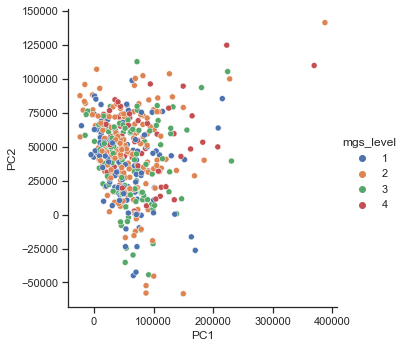

In [19]:
#Plotting using Seaborn
labels = ['1','2','3','4']
sns.relplot(data = final_df, x="PC1",y="PC2",hue="mgs_level",hue_order=labels)